In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from altair import Chart, X,Y, Axis, Scale, Color, Legend, Shape

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
df = pd.read_csv("../data/double_hybrid_bucket_basic_circuits.csv")

## Double qRAM circuit

This notebook investigates a special case of the address structure where addresses containing 1s are Cartesian products of two smaller spaces. For example, for two spaces {01,10} x {011,110,111}, 01011 is valid, 01110, 01111, 10011, etc. This effectively allows us to check the validity of the two components separately, using smaller mixed-polarity gates, and then check if both cases were successful using a Toffoli.

*If* we were to find an address space with this structure, we could see quite an improvement in resource counts. However this space is very artificial and it is questionable whether or not we could make use of it in practice; the takeaway is that, if there is special structure, we can probably leverage it.

**Note**: while these circuits were not included in the paper, they were included in my thesis. See [thesis] for circuit diagrams and descriptions of relevant parameters.

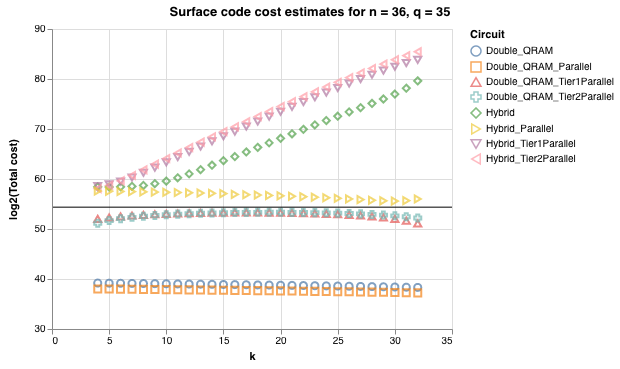

In [6]:
# Surface code cost comparison for *all* circuits (basic, hybrid, double)
bb = df[df['name'] == 'BucketBrigadeParallel']
bb = bb[bb['n'] == 36]

hybrid = df[[df['name'][i][0:6] == "Hybrid" for i in range(df.shape[0])]]
hybrid = hybrid[hybrid['k'] > 0]
hybrid = hybrid[np.logical_and(hybrid['n'] == 36, hybrid['q'] == 35)]

double = df[[df['name'][i][0:6] == "Double" for i in range(df.shape[0])]]
double = double[np.logical_and(double['n'] == 36, np.logical_and(double['q'] == 35, double['b1'] == 17))]
                 
title = "Surface code cost estimates for n = 36, q = 35"

points = Chart(hybrid, title=title).mark_point(size=50).encode(
                              x=X('k',
                                  scale=Scale(domain=[2,34]),
                                  axis=Axis(title="k",tickCount=6)),
                              y=Y('total_cost',
                                  scale=Scale(domain=[30,90]),
                                  axis=Axis(title="log2(Total cost)")), shape='name',
                              color=Color('name', legend=Legend(title="Circuit")))
points_d = Chart(double, title=title).mark_point(size=50).encode(
                              x=X('k',
                                  scale=Scale(domain=[2,34]),
                                  axis=Axis(title="k",tickCount=6)),
                              y=Y('total_cost',
                                  scale=Scale(domain=[30,90]),
                                  axis=Axis(title="log2(Total cost)")), shape='name',
                              color=Color('name', legend=Legend(title="Circuit")))

rules_bb = Chart(bb).mark_rule().encode(y='total_cost')

points + points_d + rules_bb

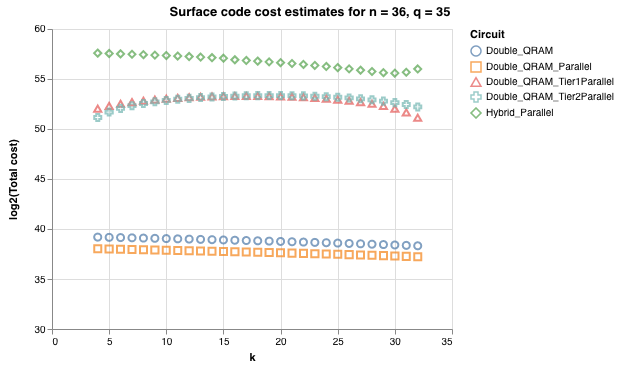

In [7]:
# Surface code costs for parallel hybrid and all doubles
hybrid = df[df['name'] == "Hybrid_Parallel"]
hybrid = hybrid[hybrid['k'] > 0]
hybrid = hybrid[np.logical_and(hybrid['n'] == 36, hybrid['q'] == 35)]

double = df[[df['name'][i][0:6] == "Double" for i in range(df.shape[0])]]
double = double[np.logical_and(double['n'] == 36, np.logical_and(double['q'] == 35, double['b1'] == 17))]
                 
title = "Surface code cost estimates for n = 36, q = 35"

points = Chart(hybrid, title=title).mark_point(size=50).encode(
                              x=X('k',
                                  scale=Scale(domain=[2,34]),
                                  axis=Axis(title="k",tickCount=6)),
                              y=Y('total_cost',
                                  scale=Scale(domain=[30,60]),
                                  axis=Axis(title="log2(Total cost)")), shape='name',
                              color=Color('name', legend=Legend(title="Circuit")))
points_d = Chart(double, title=title).mark_point(size=50).encode(
                              x=X('k',
                                  scale=Scale(domain=[2,34]),
                                  axis=Axis(title="k",tickCount=6)),
                              y=Y('total_cost',
                                  scale=Scale(domain=[30,60]),
                                  axis=Axis(title="log2(Total cost)")), shape='name',
                              color=Color('name', legend=Legend(title="Circuit")))

points + points_d 

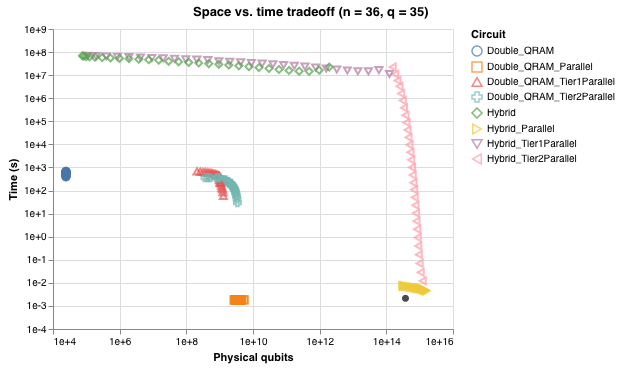

In [9]:
# Space vs. time tradeoff for all double and hybrids with n = 36, q = 35
hybrids = df[np.logical_and([df['name'][i][0:6] == "Hybrid" for i in range(df.shape[0])], np.logical_and(df['n'] == 36, df['q'] == 35))]
doubles = df[np.logical_and([df['name'][i][0:6] == "Double" for i in range(df.shape[0])], np.logical_and(df['n'] == 36, df['q'] == 35))]
doubles = doubles[doubles['b1'] == 17]

bb = df[df['name'] == 'BucketBrigadeParallel']
bb = bb[bb['n'] == 36]

h_lines = Chart(hybrids, title="Space vs. time tradeoff (n = 36, q = 35)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log',
                                              domain=[1e4,1e16]),
                                  axis=Axis(title="Physical qubits",
                                            format="e")),
                              y=Y('total_time',
                                  scale=Scale(type='log',domain=[1e-4,1e9]),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )

d_lines = Chart(doubles, title="Space vs. time tradeoff (n = 36, q = 35)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log',
                                              domain=[1e4,1e16]),
                                  axis=Axis(title="Physical qubits",
                                            format="e",tickCount=6)),
                              y=Y('total_time',
                                  scale=Scale(type='log',domain=[1e-4,1e9]),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )

points = Chart(bb).mark_circle(size=50, color='black').encode(x=X('total_phys_q'), y=('total_time'))

h_lines + d_lines + points

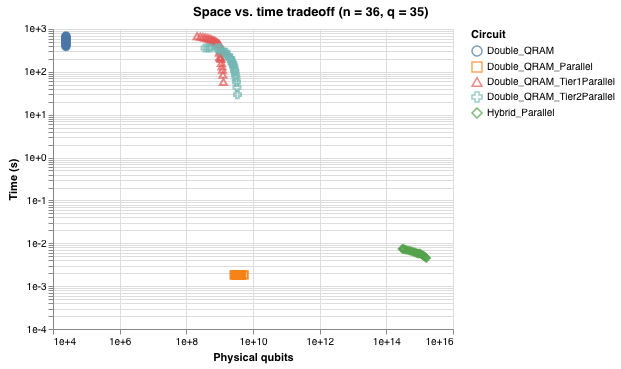

In [11]:
# Space vs. time tradeoff for double and hybrid parallel only
hybrids = df[df['name'] == 'Hybrid_Parallel']
hybrids = hybrids[np.logical_and(hybrids['n'] == 36, hybrids['q'] == 35)]
doubles = df[np.logical_and([df['name'][i][0:6] == "Double" for i in range(df.shape[0])], np.logical_and(df['n'] == 36, df['q'] == 35))]
doubles = doubles[doubles['b1'] == 17]

h_lines = Chart(hybrids, title="Space vs. time tradeoff (n = 36, q = 35)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log',
                                              domain=[1e4,1e16]),
                                  axis=Axis(title="Physical qubits",
                                            format="e")),
                              y=Y('total_time',
                                  scale=Scale(type='log',domain=[1e-4,1e3]),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )

d_lines = Chart(doubles, title="Space vs. time tradeoff (n = 36, q = 35)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log',
                                              domain=[1e4,1e16]),
                                  axis=Axis(title="Physical qubits",
                                            format="e",tickCount=6)),
                              y=Y('total_time',
                                  scale=Scale(type='log',domain=[1e-4,1e3]),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )
h_lines + d_lines

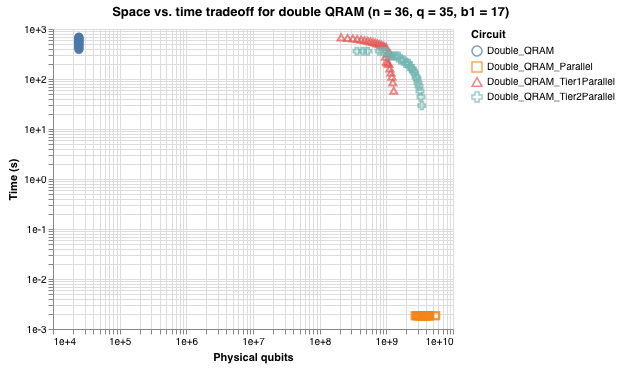

In [13]:
# Same as above but with hybrid circuits removed; can play with value of b1
doubles = df[np.logical_and([df['name'][i][0:6] == "Double" for i in range(df.shape[0])], np.logical_and(df['n'] == 36, df['q'] == 35))]
doubles = doubles[doubles['b1'] == 17]

Chart(doubles, title="Space vs. time tradeoff for double QRAM (n = 36, q = 35, b1 = 17)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log',
                                              domain=[1e4,1e10]),
                                  axis=Axis(title="Physical qubits",
                                            format="e")),
                              y=Y('total_time',
                                  scale=Scale(type='log',domain=[1e-3,1e3]),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )

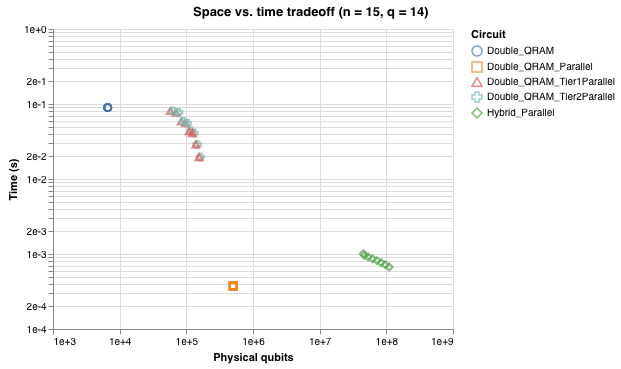

In [14]:
# Space vs. time tradeoff for small qRAM, double and hybrid parallel
hybrids = df[df['name'] == 'Hybrid_Parallel']
hybrids = hybrids[np.logical_and(hybrids['n'] == 15, hybrids['q'] == 14)]
doubles = df[np.logical_and([df['name'][i][0:6] == "Double" for i in range(df.shape[0])], np.logical_and(df['n'] == 15, df['q'] == 14))]
doubles = doubles[doubles['b1'] == 7]

h_lines = Chart(hybrids, title="Space vs. time tradeoff (n = 15, q = 14)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log',
                                              domain=[1e3,1e9]),
                                  axis=Axis(title="Physical qubits",
                                            format="e")),
                              y=Y('total_time',
                                  scale=Scale(type='log',domain=[1e-4,1]),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )

d_lines = Chart(doubles, title="Space vs. time tradeoff (n = 15, q = 14)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log',
                                              domain=[1e3,1e9]),
                                  axis=Axis(title="Physical qubits",
                                            format="e",tickCount=6)),
                              y=Y('total_time',
                                  scale=Scale(type='log',domain=[1e-4,1]),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )
h_lines + d_lines

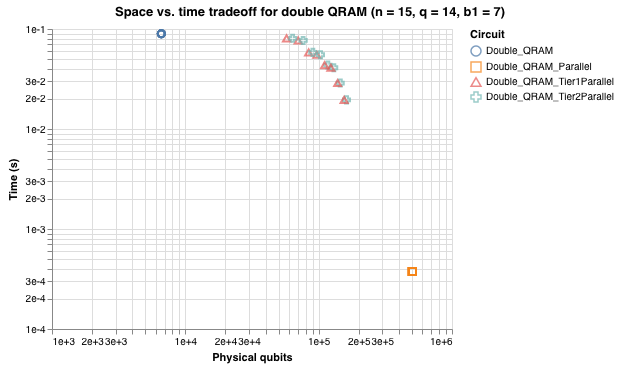

In [15]:
# Same as above but doubles only
doubles = df[np.logical_and([df['name'][i][0:6] == "Double" for i in range(df.shape[0])], np.logical_and(df['n'] == 15, df['q'] == 14))]
doubles = doubles[doubles['b1'] == 7]

Chart(doubles, title="Space vs. time tradeoff for double QRAM (n = 15, q = 14, b1 = 7)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log',),
                                  axis=Axis(title="Physical qubits",
                                            format="e")),
                              y=Y('total_time',
                                  scale=Scale(type='log'),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )

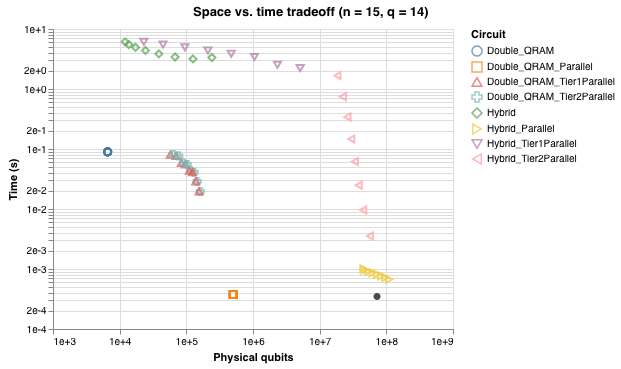

In [16]:
# Space vs. time tradeoff for all circuits
hybrids = df[np.logical_and([df['name'][i][0:6] == "Hybrid" for i in range(df.shape[0])], np.logical_and(df['n'] == 15, df['q'] == 14))]
doubles = df[np.logical_and([df['name'][i][0:6] == "Double" for i in range(df.shape[0])], np.logical_and(df['n'] == 15, df['q'] == 14))]
doubles = doubles[doubles['b1'] == 7]

bb = df[df['name'] == 'BucketBrigadeParallel']
bb = bb[bb['n'] == 15]

h_lines = Chart(hybrids, title="Space vs. time tradeoff (n = 15, q = 14)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log'),
                                  axis=Axis(title="Physical qubits",
                                            format="e")),
                              y=Y('total_time',
                                  scale=Scale(type='log'),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )

d_lines = Chart(doubles, title="Space vs. time tradeoff (n = 15, q = 14)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log'),
                                  axis=Axis(title="Physical qubits",
                                            format="e",tickCount=6)),
                              y=Y('total_time',
                                  scale=Scale(type='log'),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )

points = Chart(bb).mark_circle(size=50, color='black').encode(x=X('total_phys_q'), y=('total_time'))

h_lines + d_lines + points